# Credit Risk Project 

## Introduction & Project Goals
After the financial crisis in 2008 banks and other lenders have had quite the journey when it comes to improving their ability to predit risky and non risky customers. 
In addition, there are strict regulations toward what features they can use and how to avoid discrimination over a certain protected class.

### The goals for this project are:
- To find the best features that predict the probabilty of default
- Produce a model that predicts default probability with high accuracy
- According to the stake holder's discretion or the economic period, pick a model with the fewest false negatives or the fewest false positives 


TN: True Negative: (good Prediction): I estimated customer as not defaulter and the actual figures register customer as not defaulted (no differences between predicted and actual default).

FN: False Negative: (bad Prediction): I estimated customer as not defaulter but, defaults

TP: True Positive: (good Prediction): I predicted customer as defaulter and indeed customer defaulted

FP: False Positive or Type I Error (bad prediction): I predicted applicant as defaulter customer, but the customer actually didn’t default.

### Data dictionary
- person_age  - Age
- person_income	- Annual Income
- person_home_ownership -	Home ownership
- person_emp_length - Employment length (in years)
- loan_intent - Loan intent
- loan_grade - Loan grade
- loan_amnt - Loan amount
- loan_int_rate - Interest rate
- loan_status - Loan status (0 is non default 1 is default)
- loan_percent_income	- Percent income
- cb_person_default_on_file	- Historical default
- cb_preson_cred_hist_length - Credit history length

## Executive Summary

In [1]:
#import libraries
import pandas as pd
import numpy as np
import acquire
import modeling_scaling
#visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
pd.set_option('display.max_columns', None)


# Data Acquisition 

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df_no_age = acquire.wrangle(df)

In [27]:
train, validate, test=acquire.split_credit_defult_df(df)
train.shape, validate.shape, test.shape

((18152, 12), (7780, 12), (6484, 12))

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18152 entries, 20568 to 15560
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  18152 non-null  int64  
 1   person_income               18152 non-null  int64  
 2   person_home_ownership       18152 non-null  object 
 3   person_emp_length           17656 non-null  float64
 4   loan_intent                 18152 non-null  object 
 5   loan_grade                  18152 non-null  object 
 6   loan_amnt                   18152 non-null  int64  
 7   loan_int_rate               16461 non-null  float64
 8   loan_status                 18152 non-null  int64  
 9   loan_percent_income         18152 non-null  float64
 10  cb_person_default_on_file   18152 non-null  object 
 11  cb_person_cred_hist_length  18152 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.8+ MB


In [29]:
# encode the categorical and ordinal variables
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["loan_grade_code"] = ord_enc.fit_transform(train[["loan_grade"]])
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code
20568,30,102000,RENT,3.0,HOMEIMPROVEMENT,A,10000,6.03,0,0.10,N,8,0.0
11177,24,72000,MORTGAGE,8.0,VENTURE,B,18000,11.86,0,0.25,N,4,1.0
25160,33,80000,OWN,12.0,HOMEIMPROVEMENT,C,9000,11.97,0,0.11,N,7,2.0
17775,23,68000,RENT,1.0,VENTURE,E,14400,17.99,1,0.21,N,2,4.0
11258,24,72444,MORTGAGE,7.0,HOMEIMPROVEMENT,B,25000,10.74,0,0.35,N,4,1.0


In [30]:
# encode the categorical and ordinal variables
dummy_df = pd.get_dummies(train[["person_home_ownership", "loan_intent","cb_person_default_on_file"]], dummy_na =False, drop_first = [True,True])
train = pd.concat([train, dummy_df], axis = 1)

In [31]:
#scale the data
columns_to_scale =  ["person_income","person_emp_length","loan_amnt","loan_status","loan_percent_income","cb_person_cred_hist_length"]
train_scaled, validate_scaled, test_scaled  = modeling_scaling.scaling_minmax(train, validate, test, columns_to_scale)


In [32]:
train.isna().mean()

person_age                     0.000000
person_income                  0.000000
person_home_ownership          0.000000
person_emp_length              0.027325
loan_intent                    0.000000
loan_grade                     0.000000
loan_amnt                      0.000000
loan_int_rate                  0.093158
loan_status                    0.000000
loan_percent_income            0.000000
cb_person_default_on_file      0.000000
cb_person_cred_hist_length     0.000000
loan_grade_code                0.000000
person_home_ownership_OTHER    0.000000
person_home_ownership_OWN      0.000000
person_home_ownership_RENT     0.000000
loan_intent_EDUCATION          0.000000
loan_intent_HOMEIMPROVEMENT    0.000000
loan_intent_MEDICAL            0.000000
loan_intent_PERSONAL           0.000000
loan_intent_VENTURE            0.000000
cb_person_default_on_file_Y    0.000000
dtype: float64

In [33]:
from sklearn.experimental import enable_iterative_imputer


In [34]:
from sklearn.impute import IterativeImputer

In [35]:
cols_to_drop = ["loan_int_rate","person_home_ownership","loan_intent","cb_person_default_on_file","loan_grade"]
X = train_scaled.drop(cols_to_drop, 1)
y = train_scaled.loan_int_rate

In [36]:
# imputing the loan int rate
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
imp = IterativeImputer(estimator = lr, verbose = 2, n_nearest_features= 4)

In [38]:
imp_fitted = imp.fit(X)

[IterativeImputer] Completing matrix with shape (18152, 17)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.28
[IterativeImputer] Change: 0.024420053820627223, scaled tolerance: 0.14400000000000002 
[IterativeImputer] Early stopping criterion reached.


In [41]:
imp.transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.03 11.86 11.97 ... 12.23 10.   11.36].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Data Preparation

#### Dropping age (discriminatory) will have both approaches to decide definitively 

In [15]:
train, validate, test=acquire.split_credit_defult_df(df_no_age)
train.shape, validate.shape, test.shape

((15960, 11), (6840, 11), (5701, 11))

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15960 entries, 6449 to 311
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               15960 non-null  int64  
 1   person_home_ownership       15960 non-null  object 
 2   person_emp_length           15960 non-null  float64
 3   loan_intent                 15960 non-null  object 
 4   loan_grade                  15960 non-null  object 
 5   loan_amnt                   15960 non-null  int64  
 6   loan_int_rate               15960 non-null  float64
 7   loan_status                 15960 non-null  int64  
 8   loan_percent_income         15960 non-null  float64
 9   cb_person_default_on_file   15960 non-null  object 
 10  cb_person_cred_hist_length  15960 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.5+ MB


array([[<AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>],
       [<AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

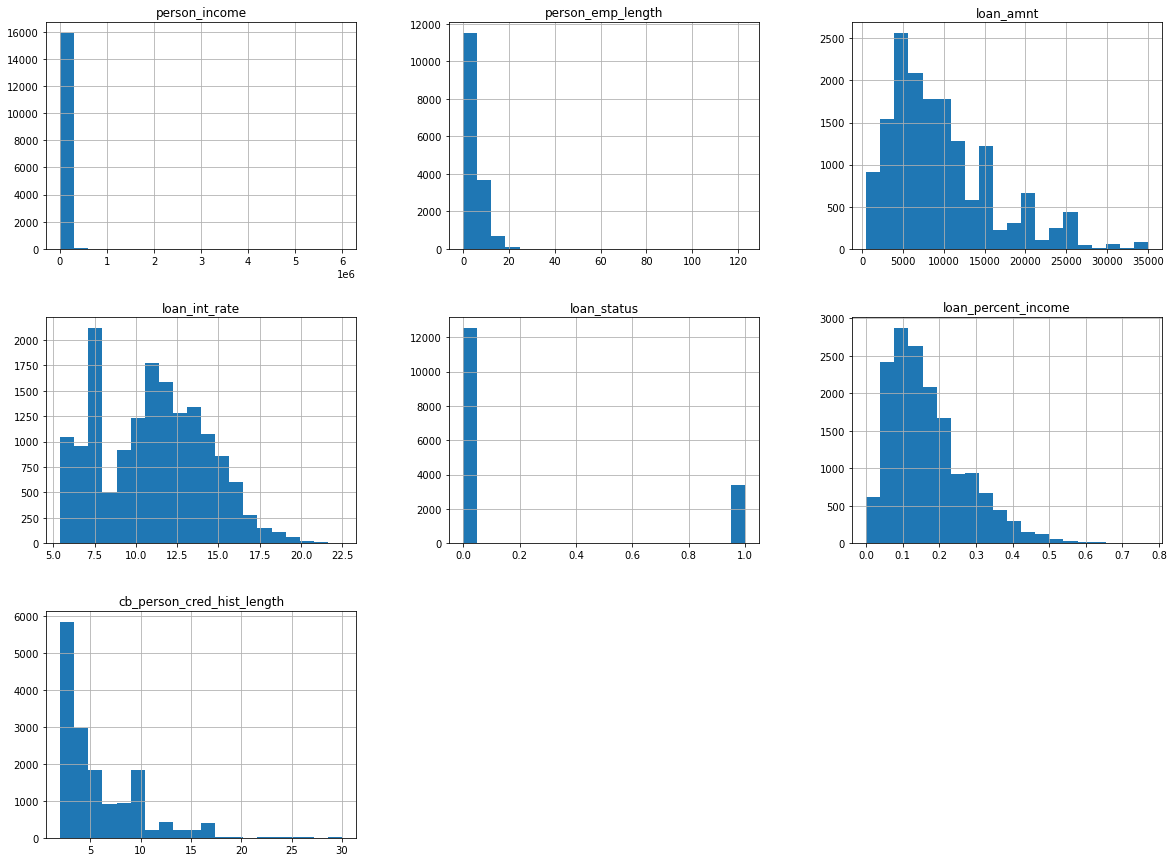

In [17]:
train.hist(bins = 20,figsize =  (20,15))


### Univariate analysis


<AxesSubplot:>

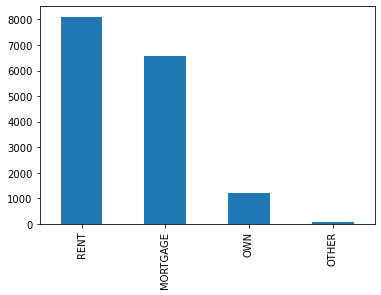

In [18]:
# plotting personal home ownership numbers
train["person_home_ownership"].value_counts().plot.bar()

#### What does the plot tell us? It tells us that there are more people who are taking loans that are renters than those who have mortgages or own homes 

<AxesSubplot:>

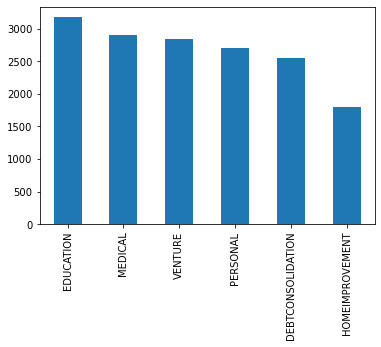

In [19]:
# plotting loan intentions
train["loan_intent"].value_counts().plot.bar()

<AxesSubplot:>

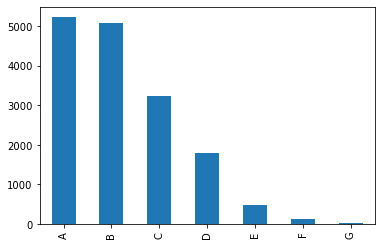

In [20]:
train["loan_grade"].value_counts().plot.bar()

#### The plot tells us that there are more people seeking loans for education. However, the difference among the reasons is not so significant

<AxesSubplot:>

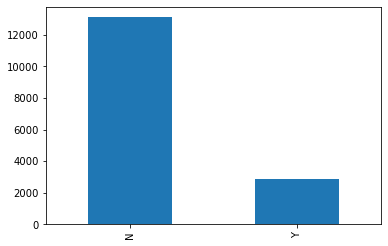

In [21]:
# visualizing the distribution of people who have defaulted
train["cb_person_default_on_file"].value_counts().plot.bar()

#### it appears that that a majority of people do not defult on their loans

In [22]:
# for i, predictor in enumerate(telco_df.drop(columns=['partner','dependents','online_backup','senior_citizen','paperless_billing','churn','tenure', 'gender','total_charges', 'monthly_charges','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])):
#     plt.figure(i)
#     plot= sns.countplot(data=telco_df, x=predictor, hue='churn')
#     plt.setp(plot.get_xticklabels(), rotation=45)    

In [23]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

